<a href="https://colab.research.google.com/github/optusudhaval/buildingAI/blob/main/assessment/OptusU_Final_Assessment_TermDeposit_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The classification goal is to predict if the client will subscribe a term deposit

> Indented block


In this notebook, we use supervised machine learning algorithms to solve a  classification type prediction problem, with two classes. The dataset is on bank term deposit attrition, where we will try to predict if deposit is Yes or No, using many input variables.

## Importing libraries



Libraries are a collection of shared files (or modules) that contain functions for use by multiples programs. These allow for common functionality to be written once and repurposed as required. 

The Python [standard library](https://docs.python.org/3/library/) contains an extensive suite of modules that are built into Python by default. For additional functionality libraries are available from [PyPI](https://pypi.org/) (the Python Package Index).

In [64]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The following two commands ignore some warnings which are generally thrown due to version updates.
import warnings
warnings.filterwarnings("ignore")

# Ex: import numpy library (as a given short name) / Here we import the entire library (called alias)
import numpy as np # Used for scientific computing and efficient multi dimensional array processing
import pandas as pd # Used for data analysis and manipulation - data frames

# Modelling utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# For Modelling 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Explainability and visualisation libraries
from xgboost import plot_tree
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
# install shap explainability
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


It is possible that some of the libraries that you are looking import are not available in Google Colaboratory by default. In order to provision the library in the environment you can install the library using the following command.

* Installing python libraries : ```!pip install {library_name}```
* Installing system packages : ```!apt-get install {package_name}```

[reference](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb)

## Load the dataset

In [65]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# These are the file IDs of the data sets
dataset_one_file_id = '1uAz9Y9t9apHhqZBzmxMUx5nyDx0V0agZ'

# Download the file from Google Drive
downloaded = drive.CreateFile({'id':dataset_one_file_id})
downloaded.GetContentFile('bank-term-deposit.csv')

In [66]:
#Load the CSV file containing the dataset.
bank_dataset = pd.read_csv("bank-term-deposit.csv")
# find out the dimensionality of the dataframe i.e. (rows, columns) 
print(bank_dataset.shape)
#Preview the first 5 lines of the loaded data
bank_dataset.head()

#(41188, 21)

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Impute missing values

In [67]:
# trim any whitespace in the dataframe using a lambda function to take each element which is a string and strip out any leading trailing spaces.
bank_dataset = bank_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# replace any blanks with NaN for consistency.
bank_dataset.replace('', np.NaN, inplace=True)
# use the isna() function to find and sum all the blank rows by each column of the dataframe.
print(bank_dataset.isna().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


## Data exploration

In [68]:
#view data types
bank_dataset.info()
#view basic stats
bank_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Target variable

Visualise the distribution of the target variable i.e. *Y* this is a binary value. Here we can already see this is an imbalanced dataset. 

In [69]:
#let's check if the dataset is imbalanced
print(bank_dataset['y'].value_counts())
print(bank_dataset['y'].value_counts(normalize=True) * 100)

no     36548
yes     4640
Name: y, dtype: int64
no     88.734583
yes    11.265417
Name: y, dtype: float64


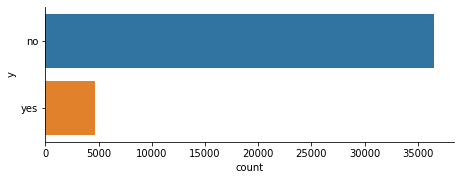

In [70]:
ax = sns.catplot(y="y", kind="count", data=bank_dataset, height=2.6, aspect=2.5, orient='h')

#### Analysis of Numerical Inputs

For numerical input variables age,	campaign,	pdays and	previous, let's plot the probability density distribution for some indications of purchase deposite or not. Think of the kdeplot as a histogram for continuous numerical values. 

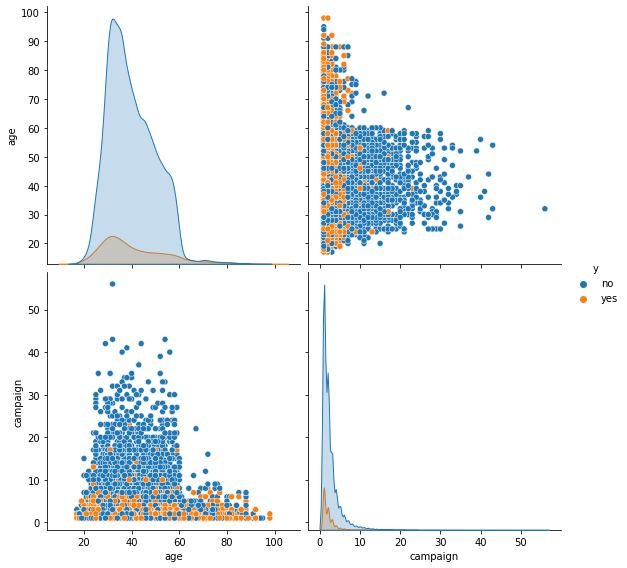

In [71]:
sns.pairplot(bank_dataset[['y', 'age',	'campaign']], hue="y", height=4)

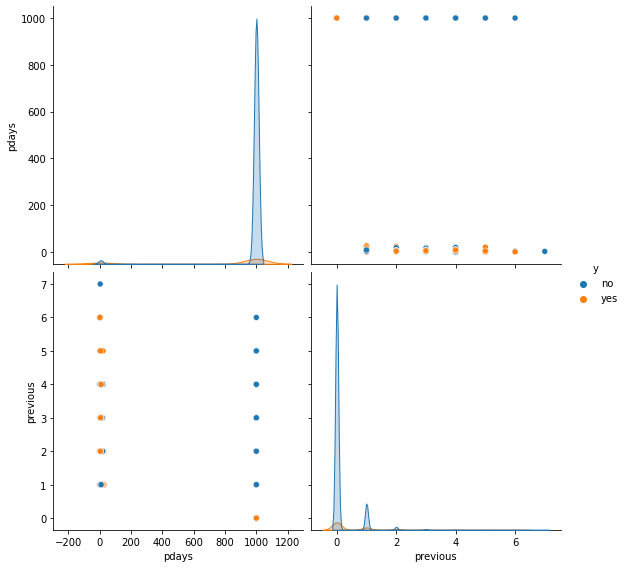

In [72]:
sns.pairplot(bank_dataset[['y', 'pdays', 'previous']], hue="y", height=4)

What are our preliminary insights? 

* age - If customer is young then it's high chance to purchase term deposit. Older customers are not much interested
* campaign - Less no of contact has high probability. 
* pdays - More no of days to contact the customer has less chance to purchase the term deposit 
* previous - Majority value is 0, it should have very less impact on the output

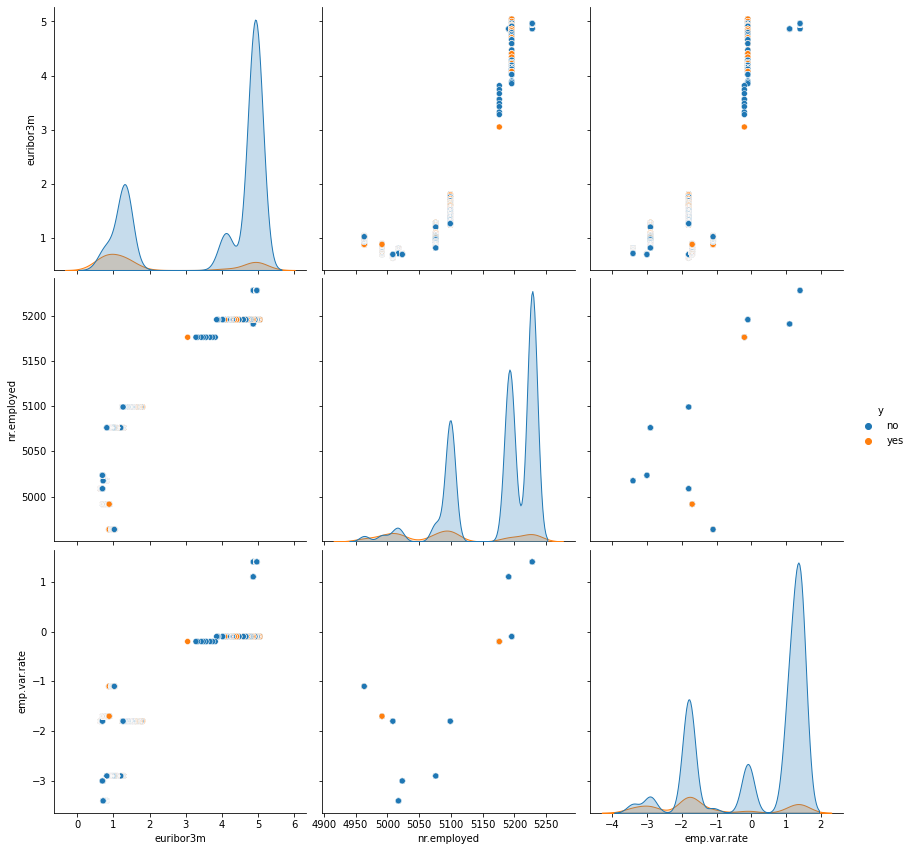

In [73]:
sns.pairplot(bank_dataset[['y', 'euribor3m', 'nr.employed', 'emp.var.rate']], hue="y", height=4)

#### Analysis of Categorical Inputs

In [74]:
def plot_categorical_features(features, title):
  fig, axs = plt.subplots(ncols=2,
                          nrows=int(len(features) / 2) + len(features) % 2)
  fig.set_size_inches(20, 10)

  row = col = 0

  for feature in features:
    plot_title = '{} - {}'.format(title, feature)
    sns.countplot(x=feature, hue="y", data=bank_dataset, ax=axs[row][col]).set_title(plot_title)

    if col == 1:
      col = 0
      row += 1
    else:
      col += 1

  plt.tight_layout()

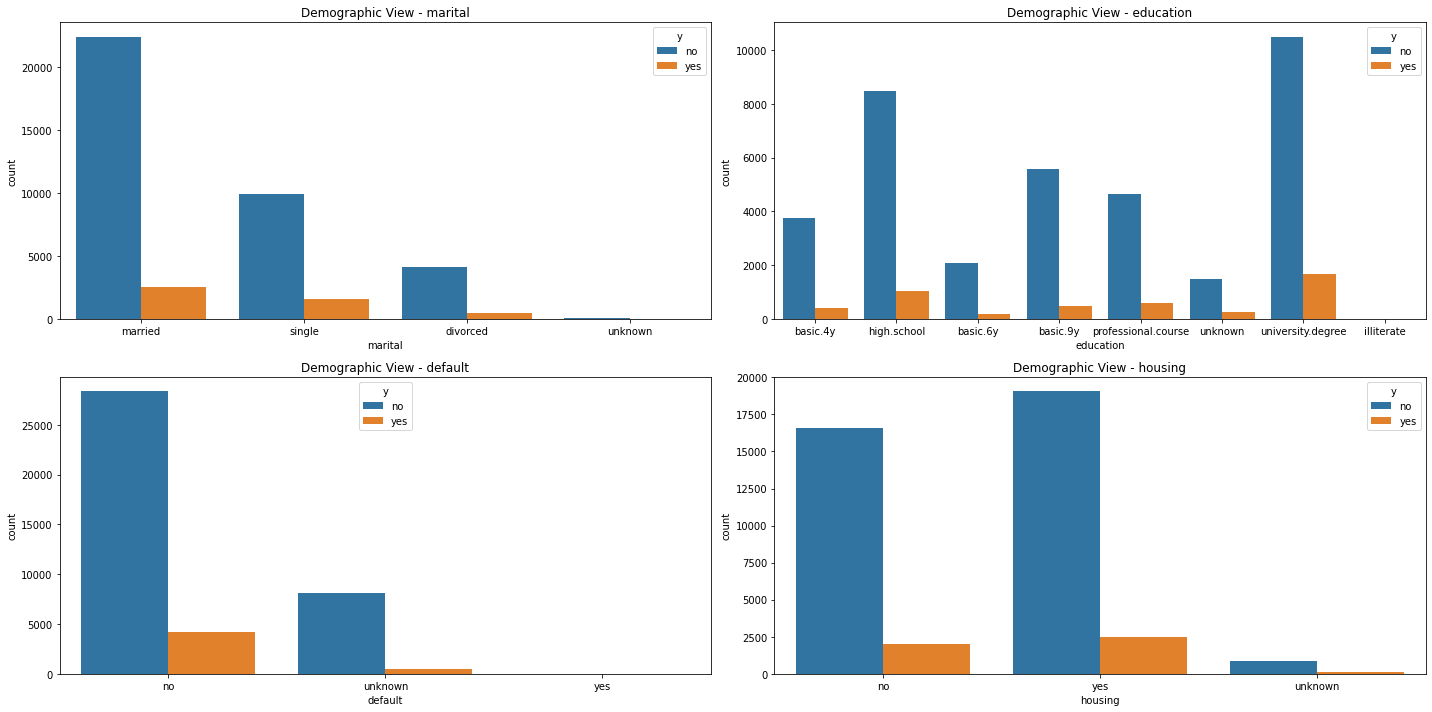

In [75]:
plot_categorical_features(['marital', 'education', 'default', 'housing'], 'Demographic View')

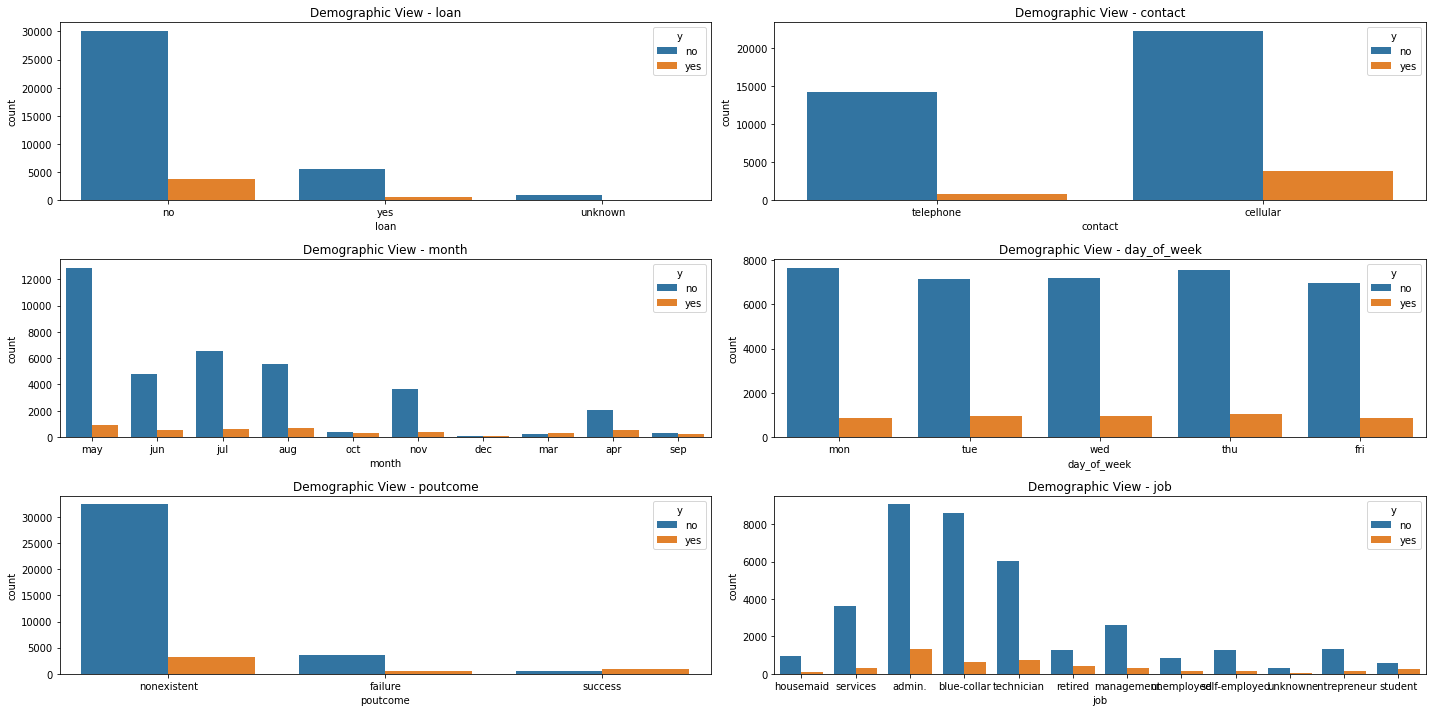

In [76]:
plot_categorical_features(['loan', 'contact', 'month', 'day_of_week','poutcome', 'job'], 'Demographic View')

## Data visualisation

#### Correlation between features

Correlation graph provides overview of feature correlation which is useful to get more insights of feature dependencies. We have replace all categorical variables before plotting the correlation matrix.

In [77]:
## There are few categorical variables that need to be preprocessed into numerical quantities that can be input to the model. 
print(bank_dataset.marital.unique())
print(bank_dataset.education.unique())
print(bank_dataset.default.unique())
print(bank_dataset.housing.unique())
print(bank_dataset.loan.unique())
print(bank_dataset.contact.unique())
print(bank_dataset.month.unique())
print(bank_dataset.day_of_week.unique())
print(bank_dataset.poutcome.unique())

['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
['nonexistent' 'failure' 'success']


In [78]:
print(bank_dataset['marital'].value_counts(normalize=True) * 100)
print(bank_dataset['education'].value_counts(normalize=True) * 100)
print(bank_dataset['default'].value_counts(normalize=True) * 100)
print(bank_dataset['housing'].value_counts(normalize=True) * 100)
print(bank_dataset['loan'].value_counts(normalize=True) * 100)
print(bank_dataset['month'].value_counts(normalize=True) * 100)
print(bank_dataset['day_of_week'].value_counts(normalize=True) * 100)
print(bank_dataset['poutcome'].value_counts(normalize=True) * 100)

married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64
university.degree      29.542585
high.school            23.101389
basic.9y               14.676605
professional.course    12.729436
basic.4y               10.138875
basic.6y                5.564728
unknown                 4.202680
illiterate              0.043702
Name: education, dtype: float64
no         79.120132
unknown    20.872584
yes         0.007284
Name: default, dtype: float64
yes        52.384190
no         45.212198
unknown     2.403613
Name: housing, dtype: float64
no         82.426920
yes        15.169467
unknown     2.403613
Name: loan, dtype: float64
may    33.429640
jul    17.417694
aug    14.999514
jun    12.911528
nov     9.956784
apr     6.390211
oct     1.743226
sep     1.383898
mar     1.325629
dec     0.441876
Name: month, dtype: float64
thu    20.935709
mon    20.671069
wed    19.748470
tue    19.641643
fri    19.003108
Name: day_of_week, dtype: f

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


<Figure size 1296x720 with 0 Axes>

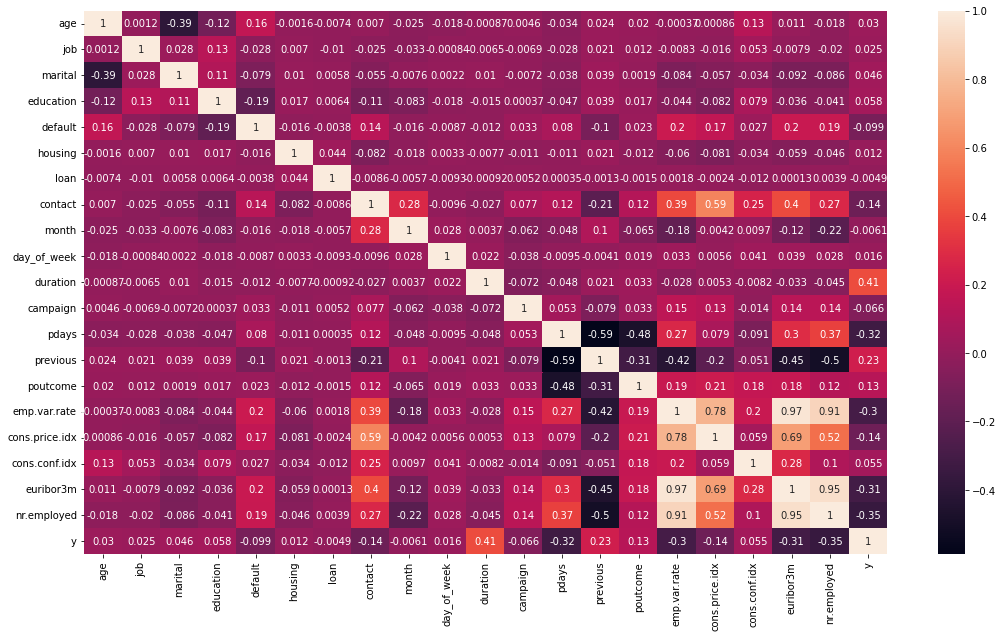

In [104]:
# Performing label encoding
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df_bank_dataset = bank_dataset.apply(lambda x: object_to_int(x))
df_bank_dataset.head()

plt.figure(figsize = (18,10))
corr_matrix = df_bank_dataset.corr()
sns.heatmap(corr_matrix, data = df_bank_dataset, annot=True)

In [105]:
#Sort correlations by the output variable "y" 
corr_matrix['y'].sort_values(ascending=True)

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
contact          -0.144773
cons.price.idx   -0.136211
default          -0.099352
campaign         -0.066357
month            -0.006065
loan             -0.004909
housing           0.011552
day_of_week       0.015967
job               0.025122
age               0.030399
marital           0.046203
cons.conf.idx     0.054878
education         0.057799
poutcome          0.129789
previous          0.230181
duration          0.405274
y                 1.000000
Name: y, dtype: float64

In [106]:
#sns.pairplot(data=df_bank_dataset, hue='y')

## Data preprocessing

In [107]:
# As per Attribute Information dropping duration column for  realistic predictive model
df_bank_dataset = df_bank_dataset.drop(columns=['duration'])

In [108]:
# Dropping row with marital status as unknown (row count is #80)
df_bank_dataset = df_bank_dataset[df_bank_dataset.marital != 'unknown']

## Building the models

In [109]:
# Here we use a different function (from the numpy library) to randomly split the dataset into test/training/validation 
train, test, validate = np.split(df_bank_dataset.sample(frac=1), [int(.6*len(df_bank_dataset)), int(.8*len(df_bank_dataset))])
print (train.shape, test.shape, validate.shape)
# (24712, 21) (8238, 21) (8238, 21)
# (24664, 20) (8222, 20) (8222, 20)

(24712, 20) (8238, 20) (8238, 20)


In [110]:
#Prepare the columns for each split 
X_train = train.drop(columns=['y'])
y_train = train[['y']]

X_test = test.drop(columns=['y'])
y_test = test[['y']]

X_validate = validate.drop(columns=['y'])
y_validate = validate[['y']]

X_train.head()
y_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
9080,32,3,2,3,0,0,0,1,4,2,2,999,0,1,1.4,94.465,-41.8,4.866,5228.1
23394,49,9,1,5,1,2,0,0,1,4,3,999,0,1,1.4,93.444,-36.1,4.964,5228.1
24854,39,0,1,6,0,0,0,0,7,3,1,999,0,1,-0.1,93.200,-42.0,4.153,5195.8
9998,41,9,1,5,1,2,0,1,4,4,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1
23157,32,0,1,6,0,0,2,0,1,3,3,999,0,1,1.4,93.444,-36.1,4.965,5228.1


,y
9080,0
23394,0
24854,0
9998,1
23157,0


In [111]:
# Fit RandomForest Classifier
rfBank = RandomForestClassifier()
rfBank.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
#Logistic regression 
bankLogReg = LogisticRegression()
#fit the model on the training data
bankLogReg.fit(X_train, y_train)

LogisticRegression()

In [113]:
#Decision tree 
bankDecisionTree = tree.DecisionTreeClassifier()
bankDecisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [114]:
# K-nearest neighbour 
bankKNN = neighbors.KNeighborsClassifier()
bankKNN.fit(X_train,y_train)

KNeighborsClassifier()

In [115]:
# XGBoost 
bankXGB = xgb.XGBClassifier()
bankXGB.fit(X_train,y_train)

XGBClassifier()

In [116]:
# Neural network - Multi-layer Perceptron
bankMLP = MLPClassifier()
bankMLP.fit(X_train,y_train)


MLPClassifier()

In [117]:
y_prob = bankDecisionTree.predict_proba(X_test  )[:, 1]
y_prob
y_prob = bankDecisionTree.predict_proba(X_test  )[:, 0]
y_prob

array([0., 0., 0., ..., 0., 0., 0.])

array([1., 1., 1., ..., 1., 1., 1.])

## Model evaluation

In [118]:
# DS: for clarity show without a loop
classifiers = [ rfBank, bankMLP, bankXGB, bankKNN, bankDecisionTree, bankLogReg]
evalTable = PrettyTable(['Name', 'Accuracy', 'F1-score', 'ROC AUC score', 'AP score'])
for i in classifiers:
  # Predict the class
  y_predict = i.predict(X_test)
  # Predict probabilities and retrieve just the probabilities for the positive class
  y_prob = i.predict_proba(X_test)[:, 1]
  evalTable.add_row( [ type(i).__name__, (round(i.score(X_test, y_test),3)), 
                      (round(metrics.f1_score(y_test, y_predict),3)), 
                      (round(metrics.roc_auc_score(y_test, y_prob),3)), 
                      (round(metrics.average_precision_score(y_test, y_prob),3)),] )

print(evalTable)

+------------------------+----------+----------+---------------+----------+
|          Name          | Accuracy | F1-score | ROC AUC score | AP score |
+------------------------+----------+----------+---------------+----------+
| RandomForestClassifier |  0.894   |  0.371   |     0.775     |  0.397   |
|     MLPClassifier      |  0.898   |  0.256   |     0.766     |  0.396   |
|     XGBClassifier      |  0.902   |  0.354   |     0.802     |   0.47   |
|  KNeighborsClassifier  |  0.891   |  0.353   |     0.728     |  0.313   |
| DecisionTreeClassifier |  0.838   |  0.311   |     0.617     |  0.174   |
|   LogisticRegression   |  0.901   |  0.307   |     0.758     |  0.417   |
+------------------------+----------+----------+---------------+----------+


Here we can see XGBoost is giving best result among all the models

In [119]:
#classification report
y_predict = bankLogReg.predict(X_test)
classreport = metrics.classification_report(y_test,y_predict)
print(classreport)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7316
           1       0.72      0.20      0.31       922

    accuracy                           0.90      8238
   macro avg       0.81      0.59      0.63      8238
weighted avg       0.89      0.90      0.88      8238



In [120]:
#confusion matrix 
confMat = metrics.confusion_matrix(y_test,y_predict)
print(confMat)

[[7245   71]
 [ 742  180]]


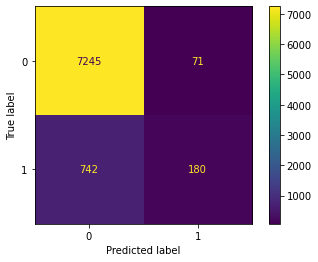

In [122]:
#a more visual confusion matrix
metrics.plot_confusion_matrix(bankLogReg, X_test, y_test, values_format='.0f')

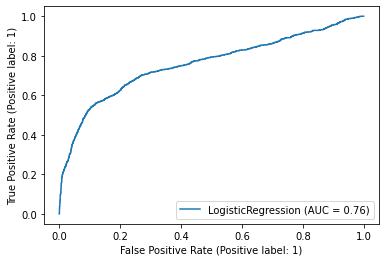

In [121]:
# A single ROC curve
metrics.plot_roc_curve(bankLogReg, X_test, y_test)

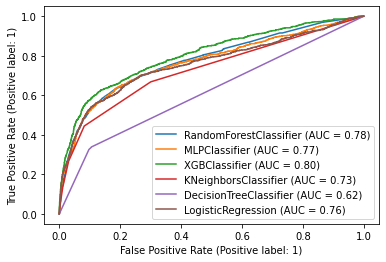

In [123]:
# All ROC curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_roc_curve(i, X_test, y_test, ax=all_axes)

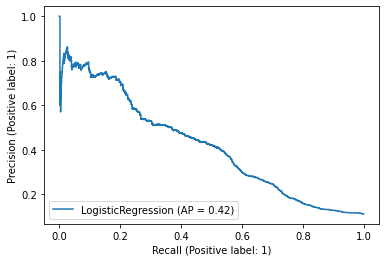

In [124]:
# A single precision-recall curve
metrics.plot_precision_recall_curve(bankLogReg, X_test, y_test)

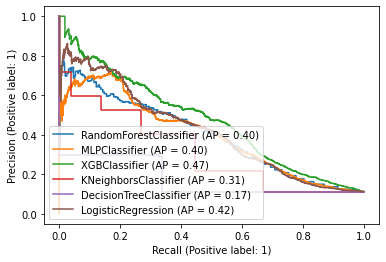

In [125]:
# All precision-recall curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_precision_recall_curve(i, X_test, y_test, ax=all_axes)

## Model explainability 

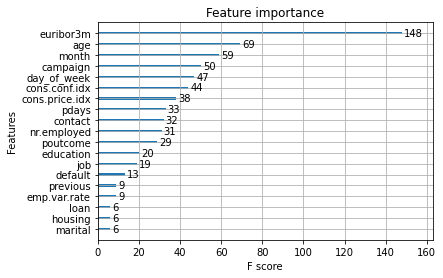

In [126]:
# Built-in function in XGBoost library for input variable (input feature) importance
xgb.plot_importance(bankXGB)

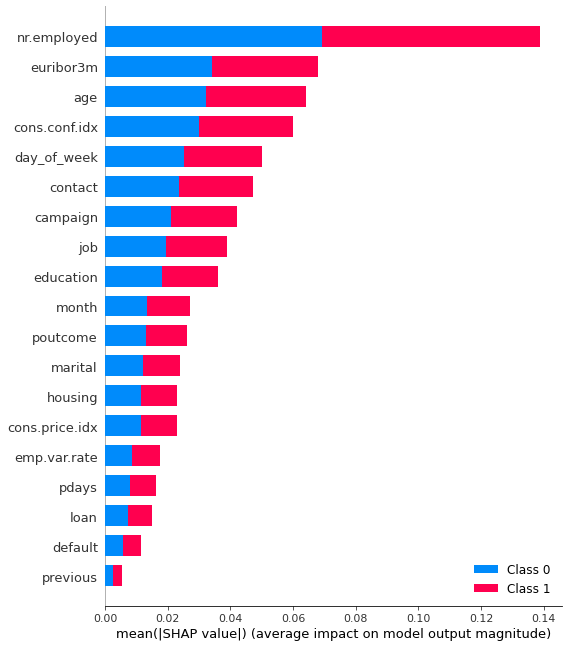

In [127]:
import shap
# Using a SHAP explainer - works for tree-based models only
shapExplainer = shap.TreeExplainer(bankDecisionTree) 
shapExplainer_values = shapExplainer.shap_values(X_train)
shap.summary_plot(shapExplainer_values, X_train)

#### Summary plots
Summary plot of SHAP values indicate how each feature is important towards the target prediction.

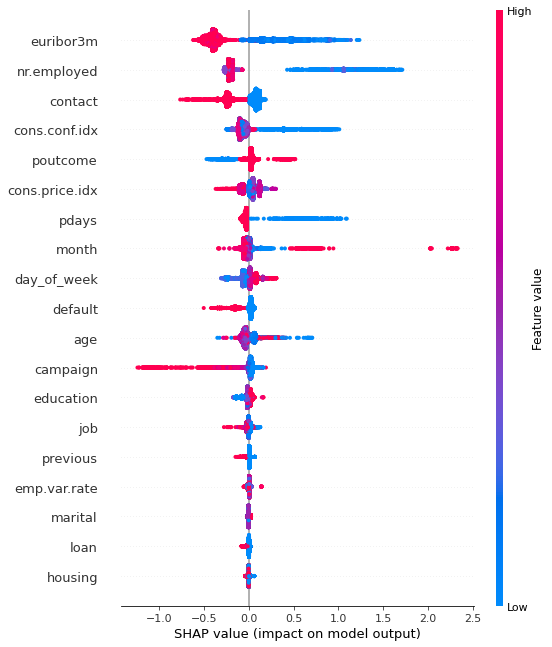

In [128]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(bankXGB)

# Calculate Shap values
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

Here we can see euribor3m is more influence parameter for our model. Lower value of euribordm means customer is more likely to purchase term deposit. The other influence parameters are number of employed, contact.